# Sales Analysis

In [20]:
import pandas as pd
import os

### mergin 12 months of sales into one single file

In [21]:
files= [file for file in os.listdir('./sales')]
all_months_data = pd.DataFrame()
for file in files:
    df = pd.read_csv("./sales/"+file)
    all_months_data = pd.concat([all_months_data, df])
all_months_data.to_csv("./sales/all_data.csv", index=False)    

### Read the merged file

In [22]:
all_data = pd.read_csv("./sales/all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Clean up the data

#### Drop rows containing NaN

In [23]:
#filter to get the Nan
nan_df = all_data[all_data.isna().any(axis=1)]
#drop NaN ('all' means delete row if it all of it contains NaN, how means=delete all row if it contains atleast 1 NaN)
all_data = all_data.dropna(how='all')
nan_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


#### Find 'Or' and delete it

In [24]:
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']

#### convert columns to the correct type

In [29]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered']) #convert to int
all_data['Price Each'] = pd.to_numeric(all_data['Price Each']) #convert to float

### Add Month column

In [26]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


### Add a sales column

In [31]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


### Add City Column

In [43]:
def get_city(address):
    return address.split(',')[1]
def get_state(address):
    return address.split(',')[2].split(' ')[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x:get_city(x)+' '+get_state(x))
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA


### Question 1: What was the best month for sales? How much was earned that month

In [32]:
#sum sales grouped by month

In [33]:
all_data.groupby('Month').sum()

,Quantity Ordered,Price Each,Sales
Month,,,
1,82,17006.80,17340.58
2,26886,4374272.08,4400547.48
3,34010,5582415.66,5614200.76
4,41116,6735342.04,6781340.48
5,37334,6270250.26,6305213.50
6,30506,5124051.22,5155604.52
7,32144,5265079.12,5295551.52
8,26896,4460690.84,4488935.76
9,26218,4169984.18,4195120.26


In [34]:
result = all_data.groupby('Month').sum()

Text(0.5, 0, 'Month number')

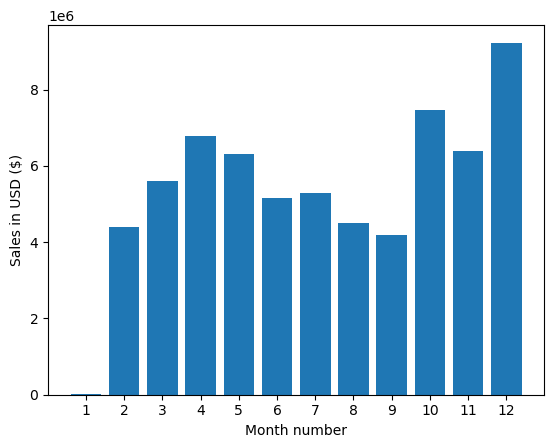

In [39]:
import matplotlib.pyplot as plt
months = range(1,13)

plt.bar(months, result['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')

### Question 2: what city had the highest number of sales

In [44]:
result = all_data.groupby('City').sum()
result

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta GA,31450,5262761.34,208014,5292670.40
Austin TX,21146,3445420.80,138604,3463989.34
Boston MA,42714,6876964.26,280126,6923730.92
Dallas TX,31702,5219502.70,207664,5249019.80
Los Angeles CA,63146,10271337.58,413590,10329913.88
New York City NY,52870,8757524.32,348876,8810133.52
Portland ME,5224,849120.64,34042,854098.94
Portland OR,21500,3537753.28,140242,3557217.14
San Francisco CA,95182,15560338.22,626332,15658200.92


Text(0.5, 0, 'City name')

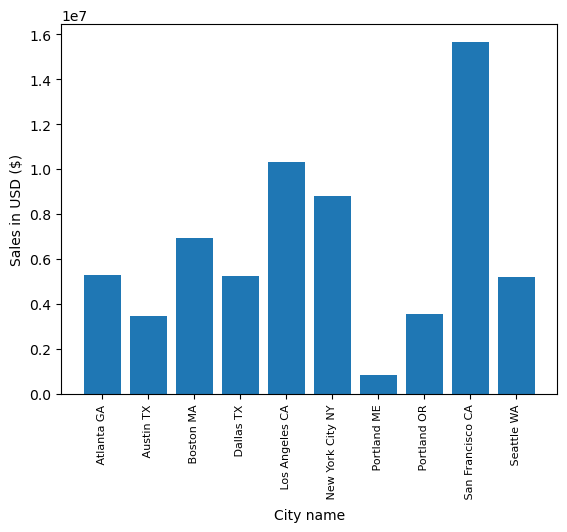

In [46]:
cities = [city for city, df in all_data.groupby('City')]

plt.bar(cities, result['Sales'])
plt.xticks(cities, rotation='vertical', size=8)
plt.ylabel('Sales in USD ($)')
plt.xlabel('City name')

### Question 3: What time should we display advertisements to maximize likelihood of customer's buying

In [47]:
#convert to datetime
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

In [49]:
#get the hour and the minute
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA,22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,9,27


Text(0.5, 0, 'Number of orders')

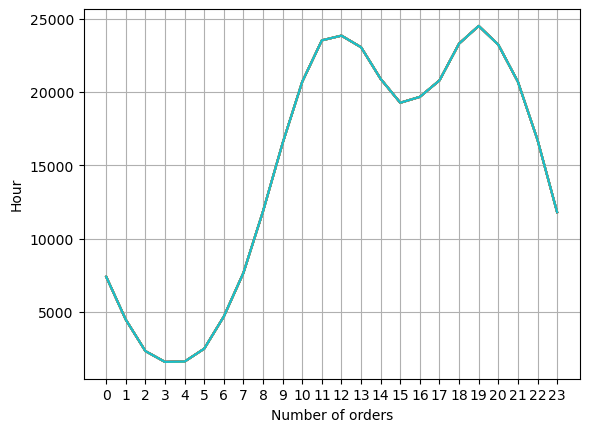

In [53]:
hours = [hour for hour, df in all_data.groupby('Hour')]

plt.plot(hours, all_data.groupby(['Hour']).count())
plt.xticks(hours)
plt.grid()
plt.ylabel('Hour')
plt.xlabel('Number of orders')

### Question 4: what products are most ofter sold together

In [55]:
#im gonna put the poducts that has the same order id in the same row than romove duplicates
df = all_data[all_data['Order ID'].duplicated(keep= False)]
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

df= df[['Order ID', 'Grouped']].drop_duplicates()
df.head(20)

,Order ID,Grouped
0,176558,"USB-C Charging Cable,USB-C Charging Cable"
2,176559,"Bose SoundSport Headphones,Bose SoundSport Hea..."
3,176560,"Google Phone,Wired Headphones,Google Phone,Wir..."
5,176561,"Wired Headphones,Wired Headphones"
6,176562,"USB-C Charging Cable,USB-C Charging Cable"
7,176563,"Bose SoundSport Headphones,Bose SoundSport Hea..."
8,176564,"USB-C Charging Cable,USB-C Charging Cable"
9,176565,"Macbook Pro Laptop,Macbook Pro Laptop"
10,176566,"Wired Headphones,Wired Headphones"
11,176567,"Google Phone,Google Phone"


In [ ]:
#count the most frequently brought together